In [3]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/b2/38/7533745b517c34b7b749a7a21f631711354a3d4d39a840d75d20c94d71a0/yfinance-0.2.51-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------- ----------------------- 337.9/948.2 kB 10.2 MB/s eta 0:00:01
     ------------------------------------  942.1/948.2 kB 11.9 MB/s eta 0:00:01
     ------------------------------------- 948.2/948.2 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Install

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#download stock data
data= yf.download('AAPL', start='2020-01-01',end='2023-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796021  72.856613  71.545387  71.799873  135480400
2020-01-03  72.088303  72.851769  71.862900  72.020439  146322800
2020-01-06  72.662720  72.701500  70.954010  71.206077  118387200
2020-01-07  72.320969  72.929314  72.100410  72.672402  108872000
2020-01-08  73.484367  73.787331  72.022872  72.022872  132079200


In [6]:
close_prices= data['Close'].values.reshape(-1,1)
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(close_prices)

In [7]:
def create_dataset(data, time_step=60):
    X,y=[], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i+ time_step), 0])
        y.append(data[i+ time_step, 0])
    return np.array(X), np.array(y)

In [8]:
X,y =create_dataset(scaled_data)

In [10]:
train_size= int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)


In [11]:
model= Sequential()
model.add (LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1], 1)))
model.add (LSTM(units=50, return_sequences= False))
model.add (Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs= 10, batch_size =32)

predictions = model.predict(X_test)
predictions =scaler.inverse_transform(predictions)

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2319
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0134
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0027
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0020
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


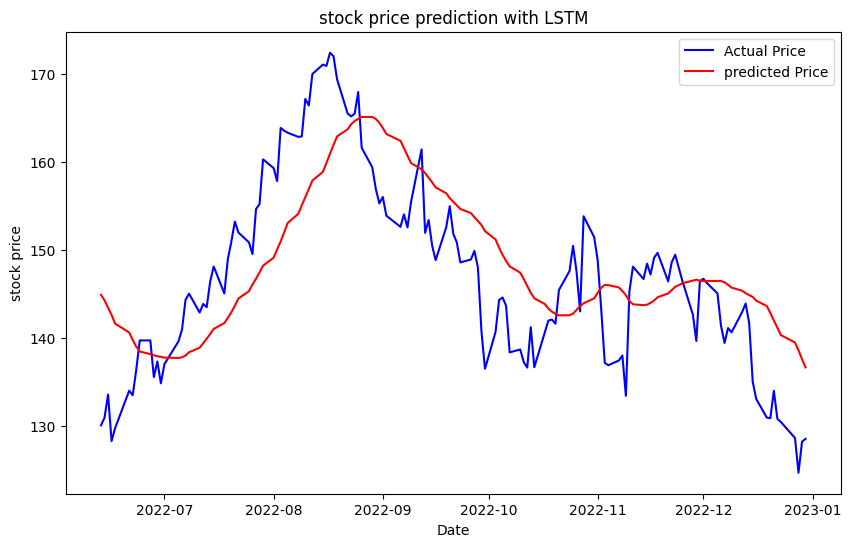

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size +60:], close_prices[train_size +60:],color='blue', label='Actual Price')
plt.plot(data.index[train_size +60:], predictions, color='red', label='predicted Price')

plt.title ('stock price prediction with LSTM')
plt.xlabel ('Date')
plt.ylabel ('stock price')
plt.legend()
plt.show()